# 📌 About the project:
I am sharing another project called "Airline Booking Data." The main objective of this project is to predict whether the customer will book a ticket or not. This is the primary focus of the project. To start the project, we need the data, which is obtained from the Kaggle website.
# 📌 Data Preprocessing steps:
The dataset contains 14 columns and 50,000 rows. We followed the usual data preprocessing steps, checking for null values and removing duplicates. Fortunately, there were no null values, but we found and removed some duplicate entries. We also visualized some basic information about the dataset, such as data types and statistical analysis.
# 📌 Explore Data Analysis process 📊 📉 📈 :
This phase is particularly interesting as we created data visualizations to gain insightful insights. We utilized bar, pie, and histogram charts to better understand the data. From the visualizations, we observed that the majority of tickets are booked through the Internet, while a smaller number are booked otherwise. Only 8% of people booked their tickets, and the rest did not. We also discovered that advertisements, discounts, and coupons can influence customers to book. Additional features such as extra baggage, meal options, and preferred seats also increased the chances of customers making a booking. We used the group by function to determine the day with the most ticket sales.
# 📌 Machine Learning Model:
Finally, we built a machine-learning model. Since the data contains categorical columns, we converted them into numerical values using the label encoder. We split the data into dependent and independent variables and applied normalization techniques using a standard scaler. The data was then divided into 70% training and 20% testing. We created a function for modeling and applied various classification algorithms, including logistic regression, random forest, and decision trees. Logistic regression, and XGBoost yielded an accuracy score of 85%.
This concludes the project, and it provides valuable insights into predicting customer behavior for airline ticket bookings.

In [34]:
# Import the Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.io as pio
import matplotlib.image as mpimg
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

In [35]:
# Load the data
data=pd.read_csv('https://raw.githubusercontent.com/sonugahoi/Data_science/main/1.%20Passanger_booking_data.csv')
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


# Data Preprocessing
- In the data preprocessing phase, we first examined the shape of the data to understand its dimensions.
- Next, we checked for null values in the dataset and removed them if any were found.
- Additionally, we performed a check for duplicate values and replaced them to ensure data integrity.
- To gain insights into the relationships between different variables, we visualized the correlation map using a heatmap. This visualization allowed us to identify patterns and dependencies among the features in the dataset, helping us understand the interplay between various attribute

In [36]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [37]:
data[data['booking_complete'] == 0].shape

(42523, 14)

In [38]:
data[data['booking_complete'] == 1].shape

(7479, 14)

In [39]:
#Checking the data shape
print(f'The dataset contains {data.shape[0]} rows and {data.shape[1]} columns')

The dataset contains 50002 rows and 14 columns


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50002 entries, 0 to 50001
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50002 non-null  int64  
 1   sales_channel          50002 non-null  object 
 2   trip_type              50002 non-null  object 
 3   purchase_lead          50002 non-null  int64  
 4   length_of_stay         50002 non-null  int64  
 5   flight_hour            50002 non-null  int64  
 6   flight_day             50002 non-null  object 
 7   route                  50002 non-null  object 
 8   booking_origin         50002 non-null  object 
 9   wants_extra_baggage    50002 non-null  int64  
 10  wants_preferred_seat   50002 non-null  int64  
 11  wants_in_flight_meals  50002 non-null  int64  
 12  flight_duration        50002 non-null  float64
 13  booking_complete       50002 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [41]:
# Statistic about the data set
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,84.940582,23.044778,9.066277,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,90.450548,33.887171,5.412569,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [42]:
# Checking the null values in the dataset
data.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [43]:
# Checking the duplicate values in the data
duplicate_values=data.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 719 duplicate values


In [44]:
# drop the duplicate values in the dataset we using the pandas function
data=data.drop_duplicates()
data.shape

(49283, 14)

# 💡About the DataSet
- #### Data Size: The dataset contains 49283 rows and 14 columns.
- #### Data Types: The data contains features with data types int64, Object, Binary and float64.
- #### Missing Values: No column has missing values in the dataset, which is a great sign and simplifies the data cleaning process.
- #### Unique Values: The number of unique values varies among features.
- #### Statistical Details: The 'min', 'max', 'average', and 'standard deviation' values indicate the range and dispersion of data for each column, highlighting potential outliers or anomalies.
- #### Irrelevant Features: All the Features seems important and useful for final evaluation.

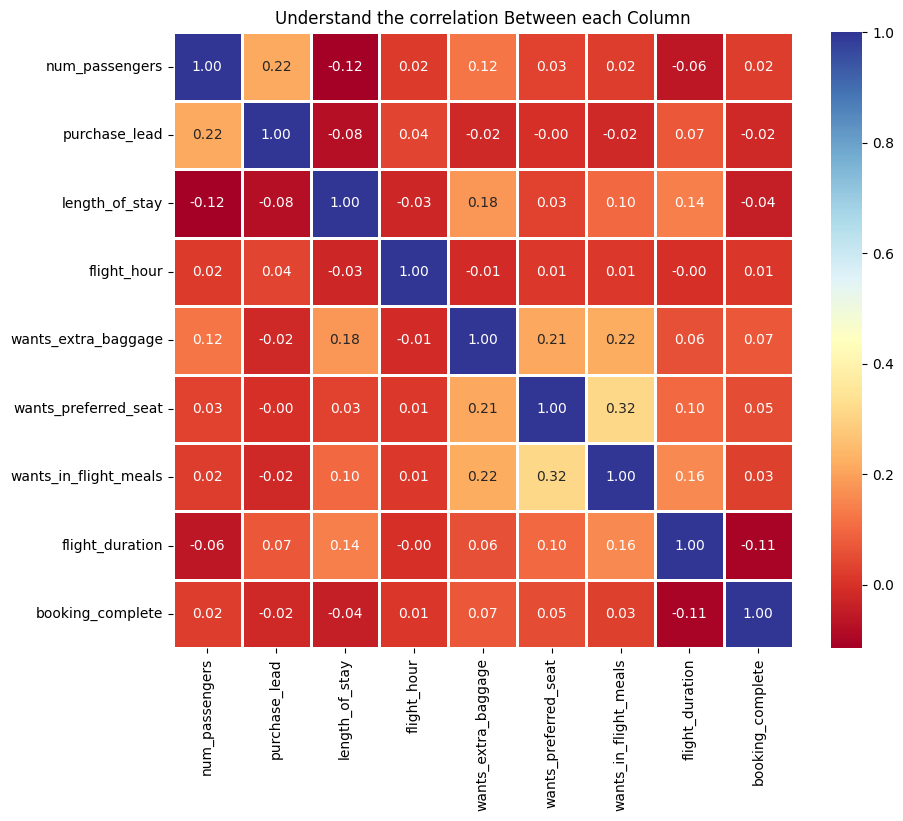

In [45]:
# Visualize the correlation map
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='RdYlBu',fmt='.2f',annot_kws=None,linewidths=1,)
plt.title("Understand the correlation Between each Column")
plt.show()

# Explore Data Analysis

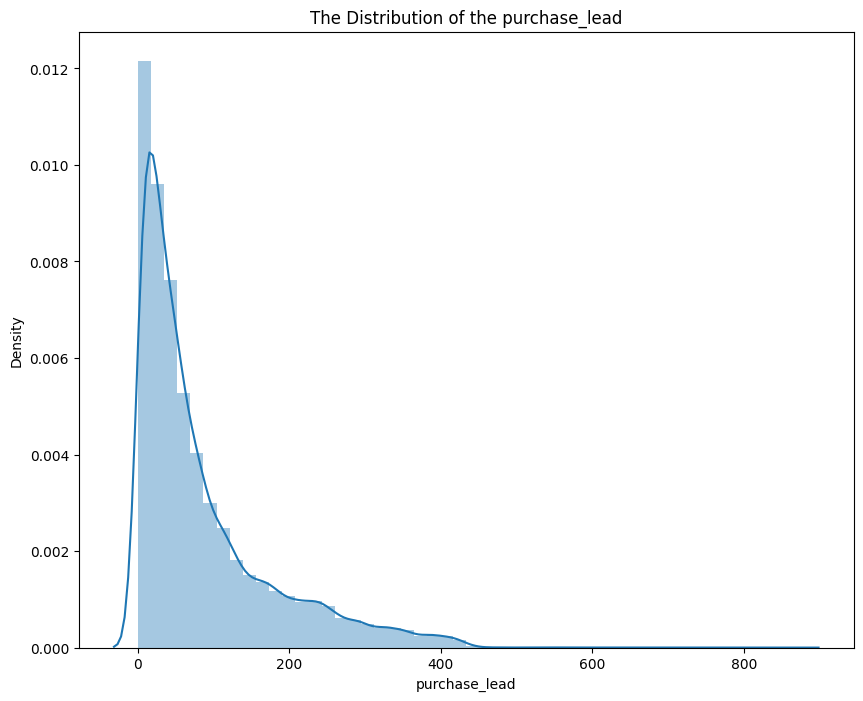

In [46]:
# Distribution of the num of passengers in the data
plt.figure(figsize=(10,8))
sns.distplot(data['purchase_lead'],hist=True,bins=50)
plt.title("The Distribution of the purchase_lead")
plt.show()

Text(0, 0.5, 'Count of values')

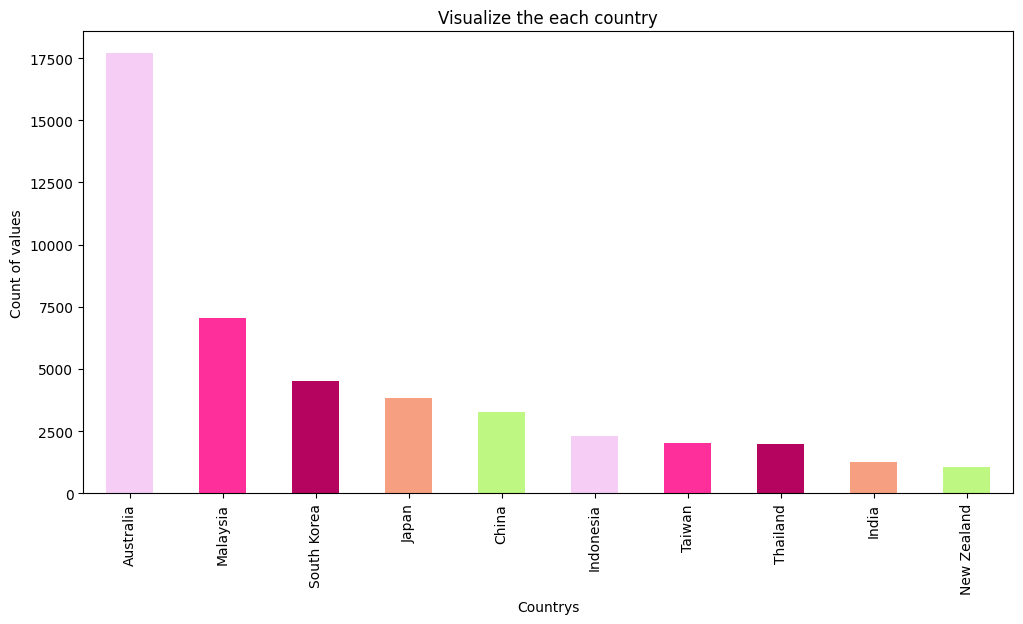

In [47]:
# Create a bar plot visualize the top 10 most demanding origin
data['booking_origin'].value_counts().sort_values(ascending=False).nlargest(10).plot(kind='bar',figsize=(12,6),color=['#F6CEF5','#FE2E9A','#B4045F','#F79F81','#BEF781'])
plt.title("Visualize the each country")
plt.xlabel("Countrys")
plt.xticks(rotation=90)
plt.ylabel("Count of values")

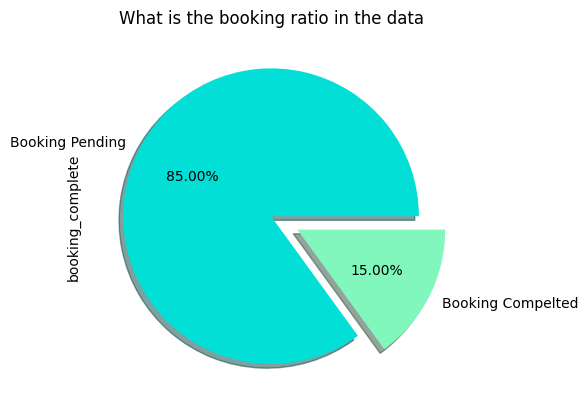

In [48]:
# Using the pie chart understand the how much precentage is complete there bookings
data['booking_complete'].value_counts().plot(kind='pie',
    explode=[0,0.2],
    labels=['Booking Pending',"Booking Compelted"],
    colors=['#01DFD7','#81F7BE'],
    autopct='%1.2f%%',
    shadow=True)
plt.title("What is the booking ratio in the data")
plt.show()

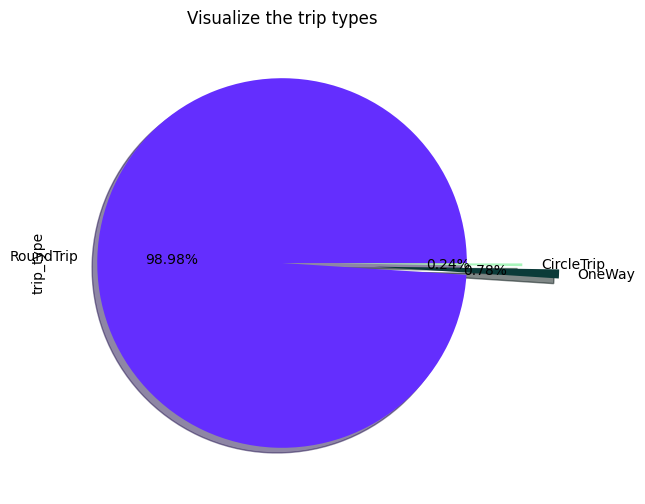

In [49]:
# How much percentage people intrested in the trip types
trip_type=['trip_type']
for i,col in enumerate(trip_type):
    plt.figure(figsize=(10,6))
    data[col].value_counts().plot(kind='pie',explode=[0,0.5,0.3],
    labels=['RoundTrip',"OneWay",'CircleTrip'],
    colors=['#642EFE','#0B3B39','#A9F5BC'],
    autopct='%1.2f%%',
    shadow=True)
plt.title("Visualize the trip types")
plt.show()

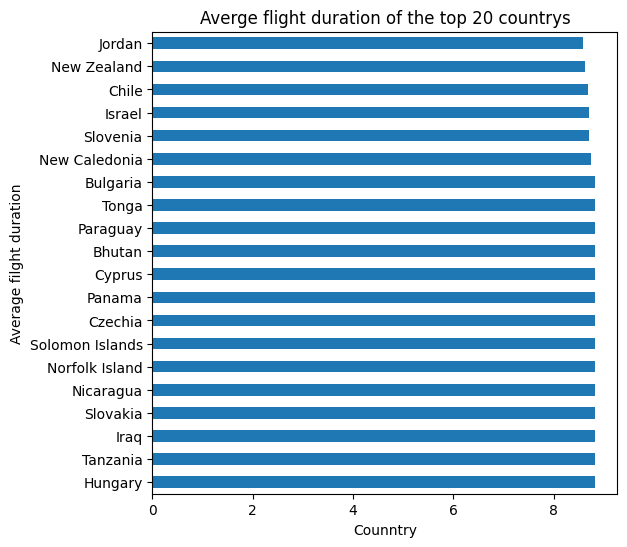

In [50]:
# Find the average flight duration of the top 20 destination in the bar charts
data.groupby('booking_origin')['flight_duration'].mean().sort_values(ascending=False).nlargest(20).plot(kind='barh',figsize=(6,6))
plt.title("Averge flight duration of the top 20 countrys")
plt.xlabel("Counntry")
plt.ylabel("Average filght duration")
plt.show()

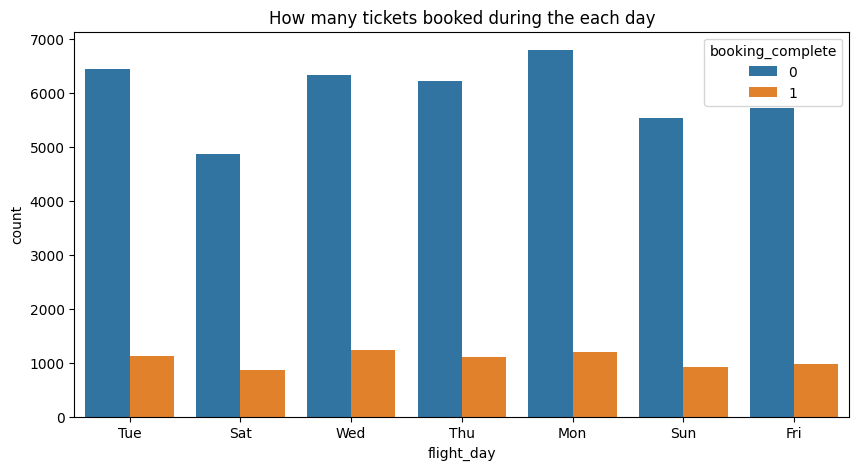

In [51]:
# Create countplot understand the booking status on the flight day
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='flight_day',hue='booking_complete')
plt.title("How many tickets booked during the each day")
plt.show()

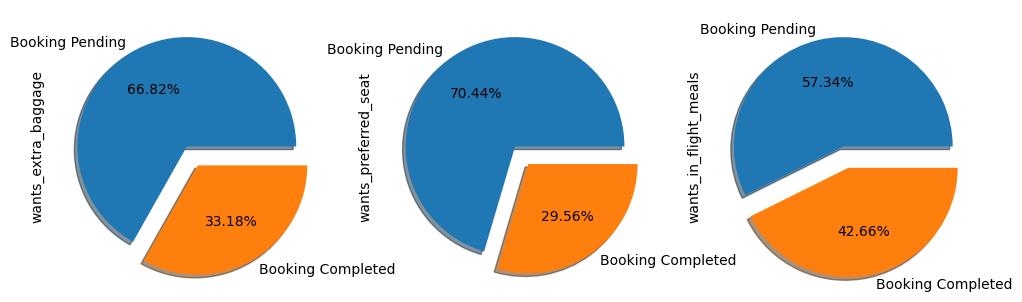

In [52]:
# Create a data frame for the extra
df=['wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals']
plt.figure(figsize=(12,5))
for i,col in enumerate(df):
    plt.subplot(1,3,i+1)
    data[col].value_counts().plot(kind='pie',explode=[0,0.2],
    labels=['Booking Pending',"Booking Completed"],
    autopct='%1.2f%%',
    shadow=True)

Text(0.5, 1.0, 'Find the how much percentage of booking completed through the channel')

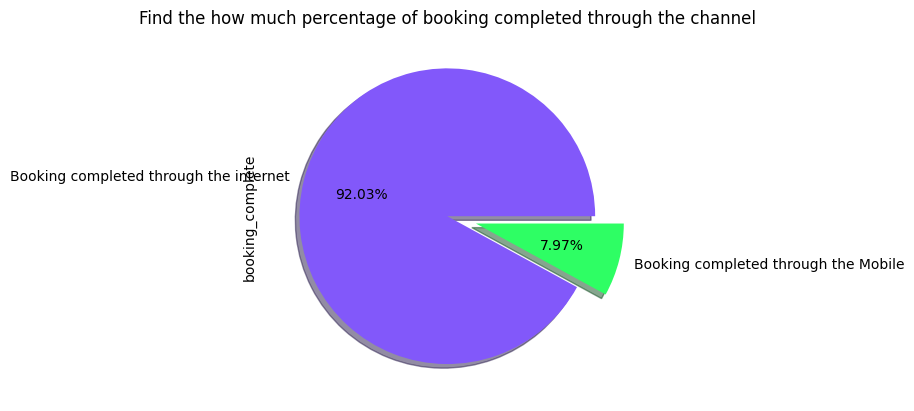

In [53]:
# Let's Compare How much percentage of the booking complete through mobile and internet
data.groupby('sales_channel')['booking_complete'].sum().plot(kind='pie',
    explode=[0,0.2],
    labels=['Booking completed through the internet',"Booking completed through the Mobile"],
    colors=['#8258FA','#2EFE64'],
    autopct='%1.2f%%',
    shadow=True)
plt.title("Find the how much percentage of booking completed through the channel")

In [54]:
# create a separate data frame for Roundtrip and find the which day most of the tickets are booked
roundtrip=data[data['trip_type']=='RoundTrip']
roundtrip.groupby(['flight_day'])[['booking_complete']].value_counts().sort_values(ascending=False).unstack().style.background_gradient()

booking_complete,0,1
flight_day,,
Fri,5647,971
Mon,6724,1191
Sat,4809,853
Sun,5465,911
Thu,6151,1104
Tue,6350,1115
Wed,6267,1222


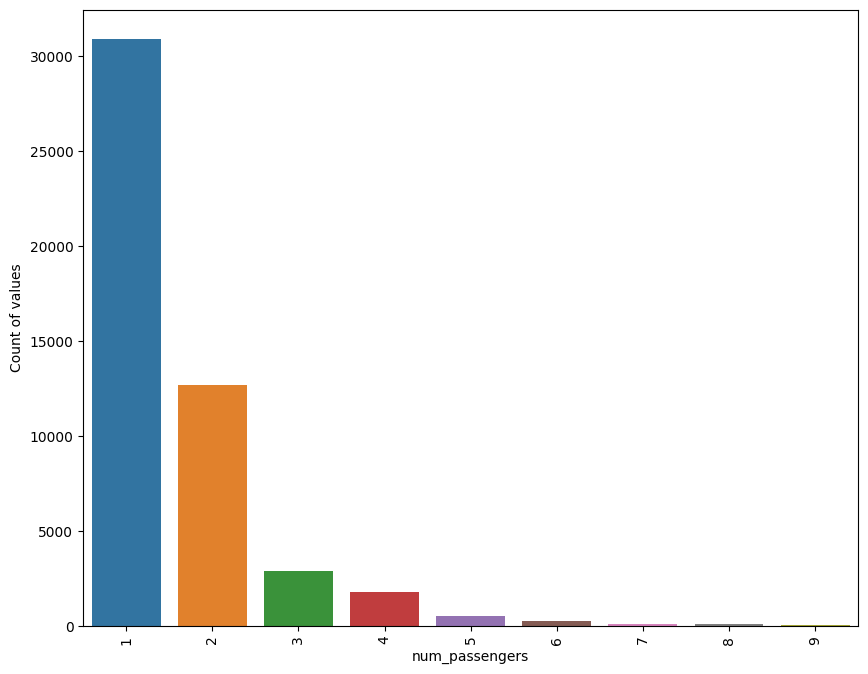

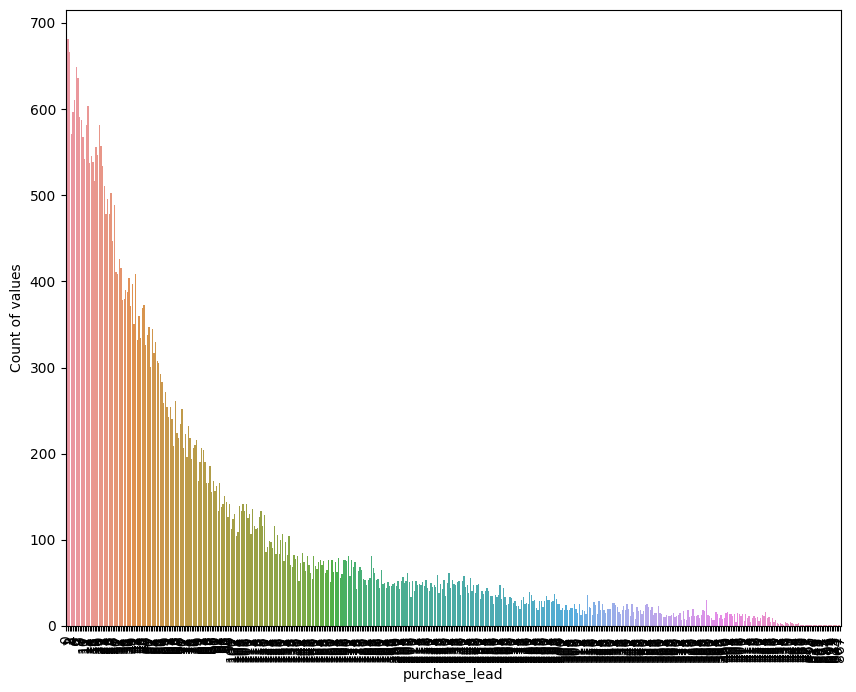

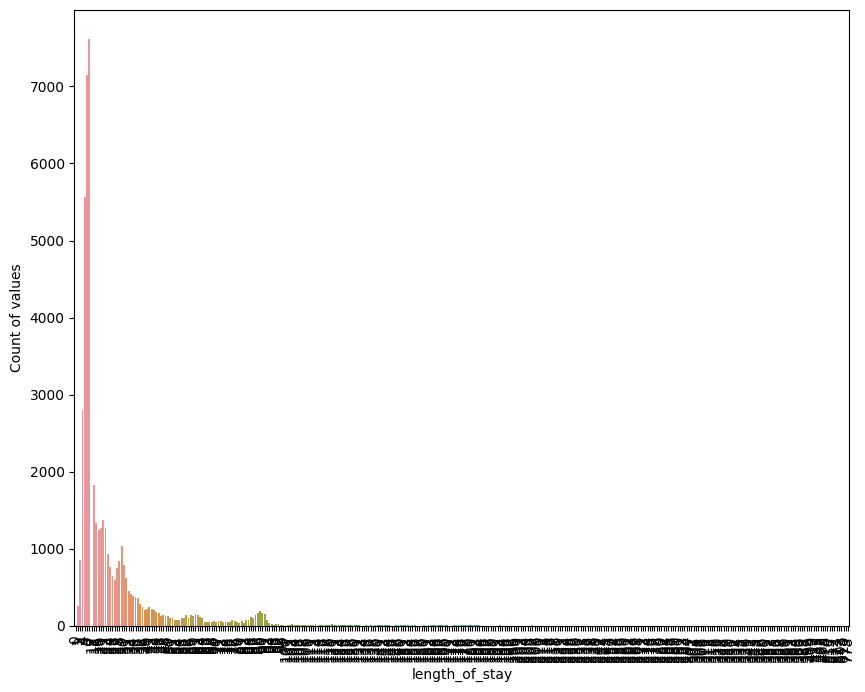

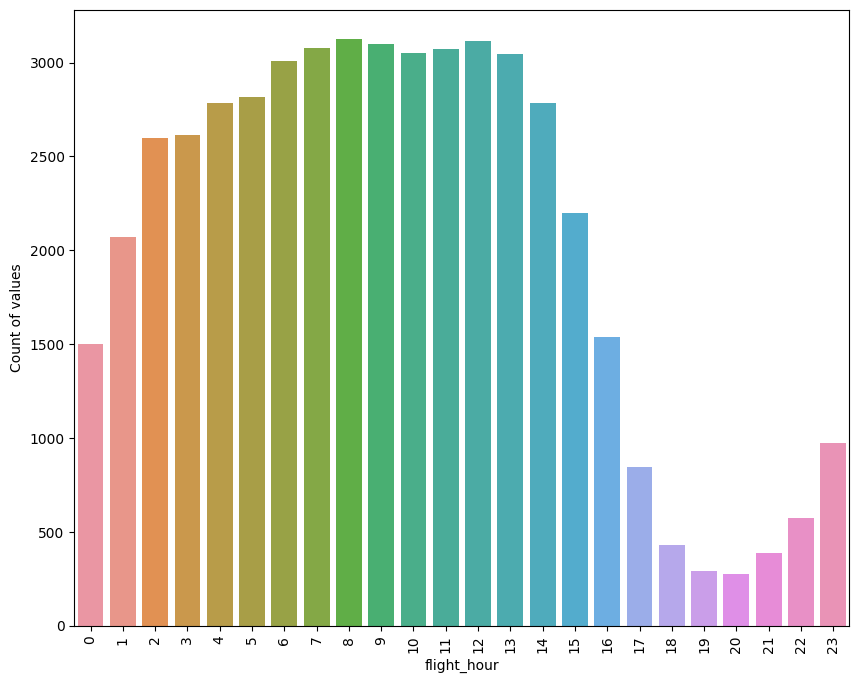

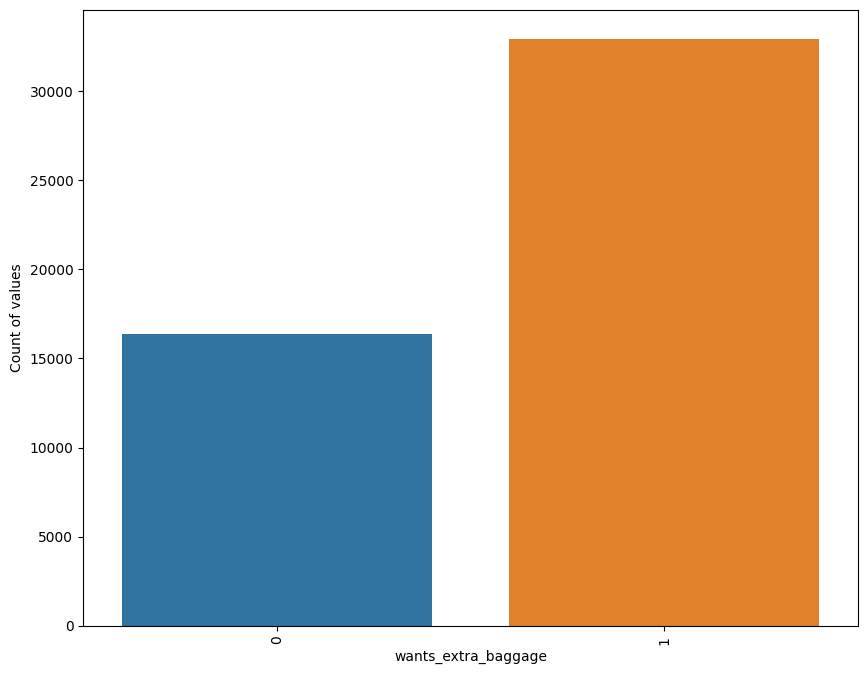

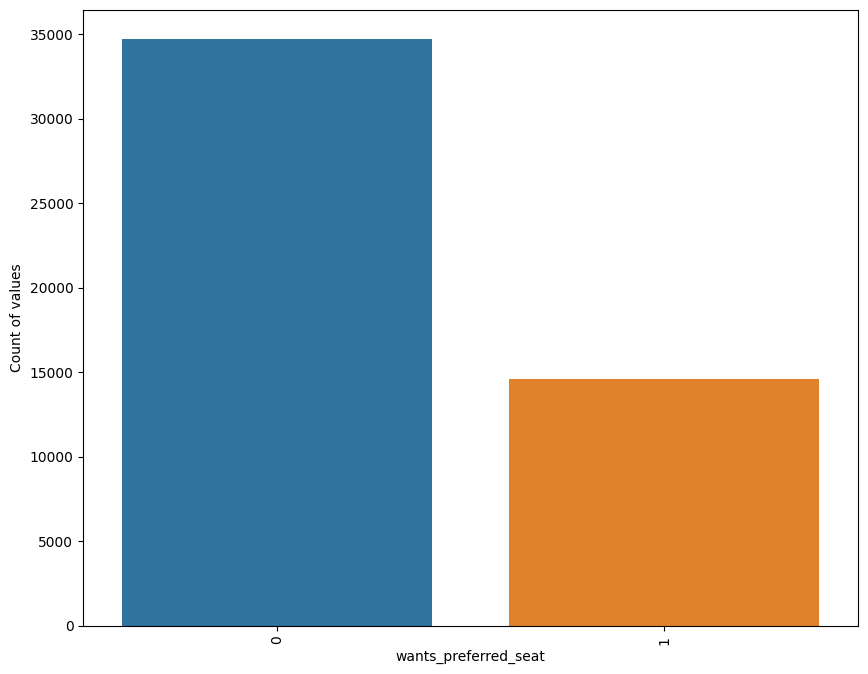

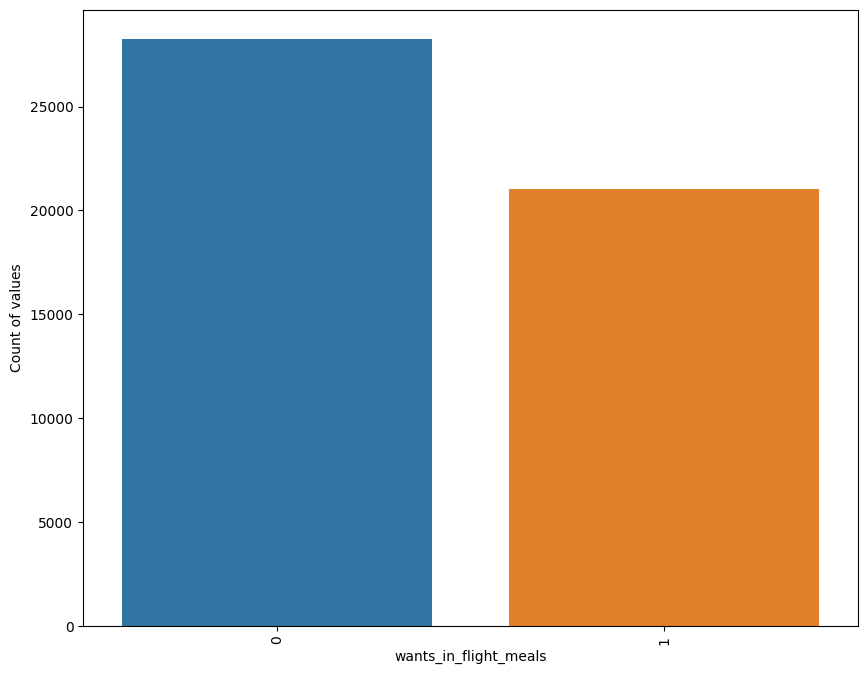

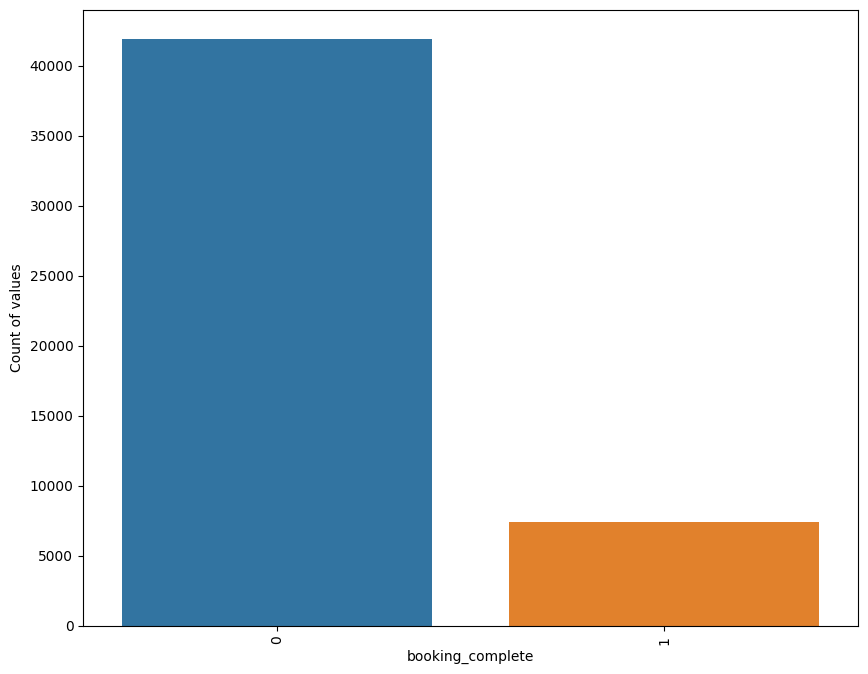

In [55]:
# Create a countplot to understand the each columns values in the data
for i in data.select_dtypes(include='int'):
    plt.figure(figsize=(10,8))
    sns.countplot(data=data,x=data[i])
    plt.xlabel(f'{i}')
    plt.ylabel('Count of values')
    plt.xticks(rotation=90)
    plt.show()

In [56]:
# Using the groupby function we find the how many bookings are done in each day trough internet and mobile
data.groupby(['sales_channel'])[['flight_day']].value_counts().sort_values(ascending=False).unstack().style.background_gradient()

flight_day,Fri,Mon,Sat,Sun,Thu,Tue,Wed
sales_channel,,,,,,,
Internet,5897,7197,4965,5591,6606,6827,6835
Mobile,788,791,758,851,717,732,728


In [57]:
#Some intresting question asked from the data

# Find the day which is more bussy and less busy days in the data
print('1- Which is the busy day in the flight booking counter: ',data['flight_day'].value_counts().idxmax())
print('\n2- Which is the less busy day in the flight booking counter: ',data['flight_day'].value_counts().idxmin())

# And the we also do same thing about the booking origin
print('\n3- Which day booking origin is bussy: ',data['booking_origin'].value_counts().idxmax())
print('\n4- Which day booking origin is less busy: ',data['booking_origin'].value_counts().idxmin())

1- Which is the busy day in the flight booking counter:  Mon

2- Which is the less busy day in the flight booking counter:  Sat

3- Which day booking origin is bussy:  Australia

4- Which day booking origin is less busy:  Vanuatu


In [58]:
# Using the pivot table find the each origin and day which day most ticket are booked.

pd.pivot_table(data,index='booking_origin',columns='flight_day',values='booking_complete',aggfunc='mean').style.background_gradient(cmap='icefire')

flight_day,Fri,Mon,Sat,Sun,Thu,Tue,Wed
booking_origin,,,,,,,
(not set),0.272727,0.000000,1.000000,0.166667,0.076923,0.076923,0.428571
Afghanistan,nan,nan,nan,nan,0.000000,nan,nan
Algeria,nan,nan,nan,nan,0.000000,nan,nan
Argentina,nan,0.000000,nan,nan,0.000000,0.000000,0.000000
Australia,0.043275,0.050264,0.053197,0.049311,0.054953,0.050225,0.052612
Austria,0.000000,0.000000,nan,0.000000,0.000000,nan,0.000000
Bahrain,nan,nan,0.500000,nan,0.666667,nan,nan
Bangladesh,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000
Belarus,0.000000,nan,nan,nan,nan,nan,nan


# Observations:
- During the Exploratory Data Analysis (EDA) phase, we identified several interesting insights.
- The distribution plot revealed that the majority of purchase leads fall within the range of 200 to 400.
- Australia recorded the highest number of purchase leads, followed by Malaysia in second place.
- Only 15% of the leads resulted in ticket bookings, indicating that 85% did not convert.
- Countries like Jordan and New Zealand had a higher average flight duration compared to others.
- The pie chart showed that 92% of bookings were completed through the internet, while 8% were completed via mobile devices.

# Machine Learning Modeling
- Firstly, we utilized the label encoder to convert categorical columns into numerical values, enabling us to work with these features in our machine learning models.

- Next, we divided the data into independent and dependent variables. To ensure uniformity in the data, we applied normalization techniques.

- Subsequently, we split the data into training and testing sets, reserving 25% of the data for testing purposes, thus allowing us to evaluate the model's performance on unseen data.

- We then proceeded to create a function for machine learning modeling. With this function, we could apply various classification algorithms to the data and compare their performance to determine the most suitable model for our task.

In [59]:
# Import the all required libraries for machine learning modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [60]:
# Covert the categorical data into the numerical using the labelencoder

for col in data.select_dtypes(include='object').columns:
    label_encoder=LabelEncoder()
    label_encoder.fit(data[col].unique())
    data[col]=label_encoder.transform(data[col])

In [61]:
#Divided the data into independent and dependent variables

X=data.drop(['booking_complete','purchase_lead','route'],axis=1)
y=data['booking_complete']

# Scalling the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Split the data into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=120)

In [62]:
# Create a function for machine learning model

def model_bulding(model,X_train,X_test,y_train,y_test):
    print(f'Model :  {model}')
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=accuracy_score(y_test,y_pred)
    print(f'\nThe Accuracy_score is :{score*100:.2f}')
    print(f'\nClassifiction Report :\n\n{classification_report(y_test,y_pred)}')
    print(f'\nConfusion Matrix : \n\n{confusion_matrix(y_test,y_pred)}')
    print('__'*20)

In [63]:
# Create all model into the dictionary formate

models={
    'logistic':LogisticRegression(),
    'Decisiontree':DecisionTreeClassifier(),
    'radnom':RandomForestClassifier(),
    'Kneighbors':KNeighborsClassifier(),
    'xGB':XGBClassifier()

}

In [64]:
# Then iterating through the each model and visualize the classification and confusion reports

for i in range(len(models)):
    model=list(models.values())[i]
    name=list(models.keys())[i]
    model_bulding(model,X_train,X_test,y_train,y_test)

Model :  LogisticRegression()

The Accuracy_score is :84.95

Classifiction Report :

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8374
           1       0.00      0.00      0.00      1483

    accuracy                           0.85      9857
   macro avg       0.42      0.50      0.46      9857
weighted avg       0.72      0.85      0.78      9857


Confusion Matrix : 

[[8374    0]
 [1483    0]]
________________________________________
Model :  DecisionTreeClassifier()

The Accuracy_score is :76.79

Classifiction Report :

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      8374
           1       0.26      0.29      0.27      1483

    accuracy                           0.77      9857
   macro avg       0.57      0.57      0.57      9857
weighted avg       0.78      0.77      0.77      9857


Confusion Matrix : 

[[7137 1237]
 [1051  432]]
_________________________________

# About the project:
- Some interesting insights are observed in the dataset. It appears that the majority of people, approximately 91%, did not book their tickets, while only 9% of the people showed interest in booking. This highlights the need to enhance the quality of extra services such as luggage handling, specific seat selection, and meal options, as these factors seem to have a significant impact on customers' decisions. Additionally, we could consider incorporating online advertisements to attract more bookings.

- Furthermore, it is notable that most of the trips are round trips. To capitalize on this trend, we should focus on promoting and improving the experience for round trips while also considering offering advertising and incentives for one-way and circular trips. By understanding these patterns and preferences, we can tailor our marketing strategies to target specific trip types and attract more customers to book their tickets.